In [3]:
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sodapy import Socrata

In [30]:
parcels = gpd.read_file('SCAG_SoPas_parcels/Draft_2019_Annual_Land_Use_Dataset_(October_2020).shp')

In [31]:
parcels = parcels.rename(columns={"APN19": "APN"})
parcels = parcels.dropna(subset=['APN'])

In [34]:
parcels['APN'] = parcels['APN'].astype('int64')

In [14]:
sites = pd.read_csv('all_sites.csv')

In [23]:
sites.dtypes

ADDRESS/INTERSECTION                     object
ZIP\rCODE                                 int64
APN                                       int64
ADDITIONAL APNS                          object
CURRENT GENERAL PLAN LAND USE            object
CURRENT ZONING                           object
PROPOSED GENERAL PLAN LAND USE           object
PROPOSED ZONING                          object
MINIMUM DENSITY ALLOWED (UNITS/ACRE)     object
MAXIMUM DENSITY ALLOWED (UNITS/ACRE)     object
PARCEL SIZE (ACRES)                     float64
EXISTING USE/VACANCY                     object
INFRASTRUCTURE                           object
OWNERSHIP                                object
SITE STATUS                              object
TYPE OF SHORTFALL                        object
LOWER INCOME CAPACITY                     int64
MODERATE INCOME CAPACITY                  int64
ABOVE MODERATE CAPACITY                   int64
TOTAL CAPACITY                            int64
dtype: object

In [35]:
combined = pd.merge(sites, parcels, on='APN', how='left')

In [37]:
pd.set_option('display.max_columns', 100)
combined.head()

,ADDRESS/INTERSECTION,ZIP\rCODE,APN,ADDITIONAL APNS,CURRENT GENERAL PLAN LAND USE,CURRENT ZONING,PROPOSED GENERAL PLAN LAND USE,PROPOSED ZONING,MINIMUM DENSITY ALLOWED (UNITS/ACRE),MAXIMUM DENSITY ALLOWED (UNITS/ACRE),PARCEL SIZE (ACRES),EXISTING USE/VACANCY,INFRASTRUCTURE,OWNERSHIP,SITE STATUS,TYPE OF SHORTFALL,LOWER INCOME CAPACITY,MODERATE INCOME CAPACITY,ABOVE MODERATE CAPACITY,TOTAL CAPACITY,OBJECTID,ACRES,MULTIPART,STACK,COUNTY,COUNTY_ID,CITY,CITY_ID,GEOID10,SLOPE,APN_DUP,IL_RATIO,LU19,LU19_SRC,LU16,CITY_GP_CO,SCAG_GP_CO,CITY_SP_CO,SCAG_SP_CO,SP_INDEX,CITY_ZN_CO,SCAG_ZN_CO,YEAR,PUB_OWN,PUB_NAME,PUB_TYPE,BF_SQFT,BSF_NAME,BSF_TYPE,FIRE,SEARISE36,FLOOD,EQUAKE,LIQUEFA,LANDSLIDE,CPAD,RIPARIAN,WILDLIFE,UZA,SEARISE72,UNBUILT_SF,TCAC_2020,grocery1mi,health1mi,opensp1mi,EJ_CODE,SCAG_CONST,SCAG_PGA,CNDDB,HCPRA,HQTA45,JOB_CTR,NMA,ABS_CONSTR,VAR_CONSTR,JURISDICTI,LU19_CLASS,Shape_Leng,Shape_Area,geometry
0,Marmion Way at Arroyo Verde Rd.,91030,5311002900,NaN,Medium Density\rResidential,RM,NaN,NaN,1 unit per parcel,14,0.06,Vacant,YES - Current,Privately\rOwned,Available,NaN,0,1,0,1,1262420.0,0.064065,1.0,0.0,Los Angeles,37.0,South Pasadena,73220.0,060374807022,5.0,0.0,NaN,1430,ASSESSOR,1120,MR,1140,None,None,0.0,RM,1140,2019.0,1.0,LACMTA,SPECIAL DISTRICT,NaN,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,Highest Resource,2.0,24.0,149.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,South Pasadena,"Transportation, Communications, and Utilities",65.230527,259.260648,"POLYGON Z ((-118.17675 34.11053 0.00000, -118...."
1,Court Ave. and Huntington Dr.,91030,5321014018,NaN,Medium Density\rResidential,RM,NaN,NaN,1 unit per parcel,14,0.09,Vacant,YES - Current,Privately\rOwned,Available,NaN,0,1,0,1,1268875.0,0.089440,1.0,0.0,Los Angeles,37.0,South Pasadena,73220.0,060374805001,NaN,0.0,0.0,1110,LU16,1110,MR,1140,None,None,0.0,RM,1140,2019.0,0.0,None,None,NaN,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,Highest Resource,4.0,97.0,17.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,South Pasadena,Single Family Residential,93.707186,361.949176,"POLYGON Z ((-118.13781 34.10517 0.00000, -118...."
2,Grevelia St. at Fairview Ave.,91030,5315011904,NaN,Medium Density\rResidential,RM,NaN,NaN,1 unit per parcel,14,0.19,Vacant,YES - Current,City-Owned,Available,NaN,0,2,0,2,1265055.0,0.186736,1.0,0.0,Los Angeles,37.0,South Pasadena,73220.0,060374806002,NaN,0.0,NaN,1820,CPAD,None,MR,1140,None,None,0.0,RM,1140,2019.0,1.0,SOUTH PASADENA CITY,CITY,0.000000,None,None,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8134.241920,Highest Resource,6.0,102.0,74.0,NaN,NaN,13.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,South Pasadena,Open Space and Recreation,129.433046,755.695802,"POLYGON Z ((-118.15472 34.11834 0.00000, -118...."
3,Monterey Rd. at Pasadena Ave.,91030,5311010012,NaN,Medium Density\rResidential,RM,NaN,NaN,1 unit per parcel,14,0.28,Vacant,YES - Current,Privately\rOwned,Available,NaN,0,3,0,3,1262735.0,0.281427,1.0,0.0,Los Angeles,37.0,South Pasadena,73220.0,060374807022,25.0,0.0,0.0,3000,LU16,3000,MR,1140,None,None,0.0,RM,1140,2019.0,0.0,None,None,NaN,None,None,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,Highest Resource,2.0,24.0,149.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,South Pasadena,Vacant,139.234439,1138.896224,"POLYGON Z ((-118.17102 34.11026 0.00000, -118...."
4,Monterey Rd. at Pasadena Ave.,91030,5311010007,NaN,Medium Density\rResidential,RM,NaN,NaN,1 unit per parcel,14,0.31,Vacant,YES - Current,Privately\rOwned,Available,NaN,0,3,0,3,1262730.0,0.311446,1.0,0.0,Los Angeles,37.0,South Pasadena,73220.0,060374807022,15.0,0.0,0.0,3000,LU16,3000,MR,1140,None,None,0.0,RM,1140,2019.0,0.0,None,None,270.208322,None,None,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13296.378529,Highest Resource,2.0,24.0,149.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,South Pasadena,Vacant,220.681913,1260.377161,"POLYGON Z ((-118.17194 34.10995 0.00000, -118...."


In [41]:
geo_sites = gpd.GeoDataFrame(combined, geometry='geometry')
geo_sites = geo_sites.to_crs(3857)

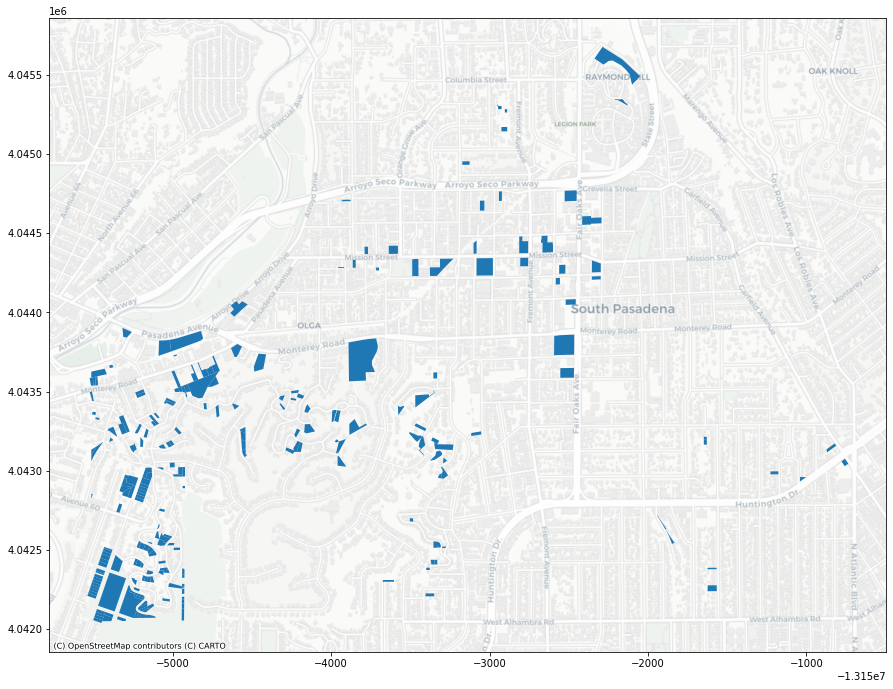

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
geo_sites.to_crs(3857).plot(ax=ax)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

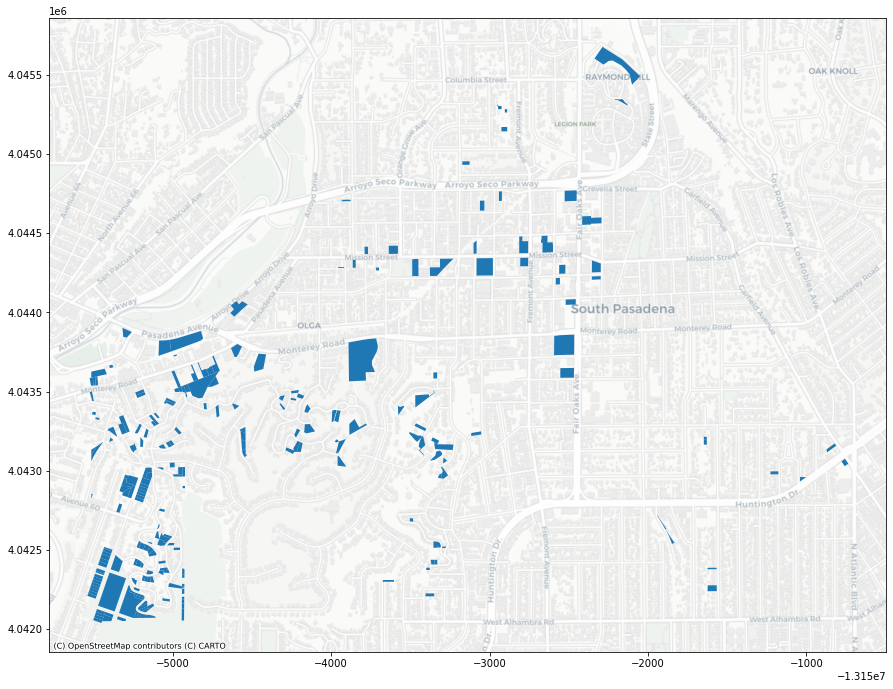

In [40]:
#need to figure out the best way to show gradation by # of low-income units
fig, ax = plt.subplots(figsize=(15,15))
geo_sites.to_crs(3857).plot(ax=ax, markersize=geo_sites['LOWER INCOME CAPACITY'])
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [55]:
#drop most of the unneeded columns for a trimmed version
colstokeep = ['ADDRESS/INTERSECTION', 'APN', 'PARCEL SIZE (ACRES)', 'EXISTING USE/VACANCY', 'CURRENT ZONING', 'LOWER INCOME CAPACITY', 'MODERATE INCOME CAPACITY', 'ABOVE MODERATE CAPACITY', 'TOTAL CAPACITY', 'geometry']
sites_trimmed = geo_sites[colstokeep]
sites_trimmed = sites_trimmed.to_crs(4326)
sites_trimmed.sample(20)

,ADDRESS/INTERSECTION,APN,PARCEL SIZE (ACRES),EXISTING USE/VACANCY,CURRENT ZONING,LOWER INCOME CAPACITY,MODERATE INCOME CAPACITY,ABOVE MODERATE CAPACITY,TOTAL CAPACITY,geometry
91,Hanscom Dr. at Illinois Dr.,5308021008,0.10,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17484 34.09956 0.00000, -118...."
175,Hill Dr. at Collis Ave.,5312017025,0.19,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17625 34.10409 0.00000, -118...."
73,Peterson Ave. and Harriman Ave.,5312016017,0.09,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17680 34.10196 0.00000, -118...."
75,Hanscom Dr. at Peterson Ave.,5308022004,0.09,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17482 34.10070 0.00000, -118...."
192,Peterson Ave and Harriman Ave.,5312016014,0.26,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17740 34.10177 0.00000, -118...."
187,Brunswick Ave. at Kolle Ave.,5311006068,0.22,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17618 34.10824 0.00000, -118...."
98,Hanscom Dr. at Peterson Ave.,5308023008,0.11,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17391 34.10089 0.00000, -118...."
124,Hanscom Dr. at Hill Dr.,5308002070,0.14,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17282 34.10540 0.00000, -118...."
191,Hanscom Dr. at Illinois Dr.,5308024034,0.25,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17415 34.10246 0.00000, -118...."
184,Camino del Sol at Las Palmitas St.,5308002072,0.22,Vacant,RS,0,0,1,1,"POLYGON Z ((-118.17282 34.10551 0.00000, -118...."


In [63]:
sites_trimmed_gj = sites_trimmed.to_json()
sites_trimmed_gj

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"ABOVE MODERATE CAPACITY": 0, "ADDRESS/INTERSECTION": "Marmion Way at Arroyo Verde Rd.", "APN": 5311002900, "CURRENT ZONING": "RM", "EXISTING USE/VACANCY": "Vacant", "LOWER INCOME CAPACITY": 0, "MODERATE INCOME CAPACITY": 1, "PARCEL SIZE (ACRES)": 0.06, "TOTAL CAPACITY": 1}, "geometry": {"type": "Polygon", "coordinates": [[[-118.17674603850091, 34.11053202748823, 0.0], [-118.17695557227499, 34.11049462383976, 0.0], [-118.1769881479121, 34.110620895278146, 0.0], [-118.17681394922883, 34.11065200939955, 0.0], [-118.17674603850091, 34.11053202748823, 0.0]]]}}, {"id": "1", "type": "Feature", "properties": {"ABOVE MODERATE CAPACITY": 0, "ADDRESS/INTERSECTION": "Court Ave. and Huntington Dr.", "APN": 5321014018, "CURRENT ZONING": "RM", "EXISTING USE/VACANCY": "Vacant", "LOWER INCOME CAPACITY": 0, "MODERATE INCOME CAPACITY": 1, "PARCEL SIZE (ACRES)": 0.09, "TOTAL CAPACITY": 1}, "geometry": {"type": "Poly

In [62]:
import plotly.express as px


fig = px.choropleth_mapbox(sites_trimmed,
                           geojson=sites_trimmed_gj,
                           locations=sites_trimmed['TOTAL CAPACITY'],
                           color='EXISTING USE/VACANCY',
                           center={"lat": 34.1112, "lon": -118.1554},
                           mapbox_style="open-street-map",
                           zoom=13)
fig.show()

In [65]:
import folium
m = folium.Map(location=[34.1112, -118.1554], zoom_start=13, tiles='CartoDB positron', 
               attribution='CartoDB')
folium.Choropleth(
                  geo_data=sites_trimmed, # geo data
                  data=tracts_race, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'PCT_Black'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Population White (2014-2018 ACS 5-Year estimates)').add_to(m)
m